In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_data = open('/content/drive/MyDrive/RestaurantReviews.csv')
next(file_data)
samples = []
for row in file_data:
    samples.append([int(item.strip()) for item in row.split(',')])
data = np.array(samples)
data

array([[    1,     0,     0, ...,     0,     0,     1],
       [    2,     0,     0, ...,     1,     1,     0],
       [    3,     0,     0, ...,     0,     0,     0],
       ...,
       [10804,     0,     0, ...,     0,     0,     0],
       [10805,     0,     0, ...,     0,     1,     0],
       [10806,     0,     0, ...,     0,     0,     1]])

In [5]:
data.shape

(10806, 677)

In [6]:
features = data[:,1:-5]
labels = data[:,-5:]

In [7]:
display(features)

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [8]:
display(labels)

array([[0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1]])

In [9]:
from sklearn.model_selection import train_test_split
X_S1, X_, Y_S1, Y_ = train_test_split(features, labels, test_size=0.35, random_state = 1)
X_S2, X_S3, Y_S2, Y_S3 = train_test_split(X_, Y_, test_size=3/7, random_state = 1)
X_S1.shape,X_S2.shape,X_S3.shape,Y_S1.shape,Y_S2.shape,Y_S3.shape

((7023, 671), (2161, 671), (1622, 671), (7023, 5), (2161, 5), (1622, 5))

In [57]:
def precision(Y_pred, Y_test):
    num = np.sum(np.logical_and(Y_pred, Y_test), axis=0)
    denom = np.sum(Y_pred, axis=0)
    precision = np.where(denom == 0, 0, np.divide(num,denom))
    average = np.mean(precision)
    return average

def recall(Y_pred, Y_test):
    num = np.sum(np.logical_and(Y_pred, Y_test), axis=0)
    denom = np.sum(Y_test, axis=0)
    recall = np.where(denom == 0, 0, np.divide(num,denom))
    average = np.mean(recall)
    return average

Q2(e). Precision represents how much of the predicted active labels are actually active.<br>while Recall represents how much of the actually active labels are predicted active.

In [56]:
Y_pred = np.array([[1, 0, 0, 1, 0, 0],[1, 0, 1, 0, 1, 0],[0, 0, 0, 0, 1, 1],[0, 1, 1, 1, 1, 1],[0, 0, 0, 1, 1, 1]])
Y_test = np.array([[1, 0, 1, 1, 0, 1],[0, 0, 1, 0, 1, 0],[1, 0, 1, 0, 1, 1],[0, 1, 1, 1, 1, 0],[0, 1, 0, 1, 1, 1]])
precision(Y_pred,Y_test)

0.8611111111111112

In [63]:
recall(Y_pred,Y_test)

0.6944444444444445

In [58]:
class Neural_Network():
    
    def __init__(self, neurons, Activations, initialization='randn'):
        
        """Define the NN design parameters
        Args:
            neurons (int array): list of numbers listing neurons for each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """
        
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer 
        self.layer_activations = [] # activations in each layer
        
        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
            raise ValueError("initialization must be 'rand' or 'randn'")
        for i in range(len(neurons)-1):
            self.weights.append(self.initializer(neurons[i+1],neurons[i])) # weight matrix between layer i and layer i+1
            self.biases.append(self.initializer(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) # activations for each layer

    # Activation Functions and their Derivatives

    def sigmoid(self, z):
        """returns result of the sigmoid activation function on input z."""                 
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self,z):
        """returns derivative of sigmoid activation function applied on input z."""
        sigma = self.sigmoid(z)
        return sigma*(1-sigma)

    def ReLU(self,z):
        """returns result of the ReLU activation function on input z."""                  
        return np.maximum(z,0)
    
    def ReLUPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        return (z>0)*1
    
    # Loss Function
    
    def binCE_loss(self, predicted, actual):
        """Implementation of Binary Cross-Entropy loss function."""
        return (-1/actual.shape[1])*(np.sum(np.multiply(actual,np.log(predicted))) + np.sum(np.multiply(1-actual,np.log(1-predicted))))
    
    def forward(self, a):
        
        """Defines forward pass of the NN
        Args:
            a (array): input of size self.inputSize
        Returns:
            (final) a (array): output of forward pass
            layer_wise_z (list): output of each layer
            activations (list): layer-wise activations
        """
        
        layer_wise_z = []
        activations = [a] # store the input as the input layer activation
        
        for i, model_para in enumerate(zip(self.biases, self.weights)):
            b, w = model_para[0], model_para[1]
            z = np.dot(w,a) + b
            if self.layer_activations[i] == 'sigmoid':
                a = self.sigmoid(z)
            elif self.layer_activations[i] == 'relu':
                a = self.ReLU(z)
            layer_wise_z.append(z)    
            activations.append(a)
        
        return a, layer_wise_z, activations
        
    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """
        
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        final_z = zs[-1] # has shape no of lables x no of samples
        n = final_z.shape[1] # number of training samples    
        # error gradient wrt final activation output
        # delta = -y/activations[-1] + (1-y)/(1-activations[-1])
        # derivative of final activation wrt z
        # phi_ = self.sigmoidPrime(final_z) = activations[-1]*(1-activations[-1])
        V = activations[-1] - y # delta*phi_ # error gradient wrt z
        grad_b[-1] = np.sum(V, axis=1, keepdims=True)/n
        grad_w[-1] = np.dot(V, activations[-2].T)/n

        for l in range(2, self.layers):
            z = zs[-l]
            # derivative of hidden layer activation wrt z
            phi_ = self.ReLUPrime(z)
            V = phi_ * np.dot(self.weights[-l+1].T, V)
            grad_b[-l] = np.sum(V, axis=1, keepdims=True)/n
            grad_w[-l] = np.dot(V, activations[-l-1].T)/n

        return (grad_b, grad_w)                 

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients
        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """
        grad_b, grad_w = grads[0], grads[1]
        for i in range(len(self.weights)):
            self.weights[i] -= lr*grad_w[i] 
            self.biases[i] -= lr*grad_b[i]

    def error(self, X, Y, errors):  
        """Appends loss to error list"""
        y = np.squeeze(self.forward(X)[0])
        errors.append(self.loss(y, Y))

    def precise(self, X, Y, precisions):  
        """Appends current average precision to precisions list"""
        y = np.squeeze(self.forward(X)[0])
        precisions.append(precision(y, Y))
    
    def rec(self, X, Y, recalls):  
        """Appends current average recall to recalls list"""
        y = np.squeeze(self.forward(X)[0])
        recalls.append(recall(y, Y))

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)
                    
    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None,
              n_classes=10, onehotencoded=False, loss_func='SE', Xval=None, Yval=None, verbose=True):
        
        """Function for training our Neural Network
        Args:
            X (ndarray): feature matrix of training data,
             Shape: (n,m) where n is no. of features and m is no. of samples.
            Y (ndarray): ground truth of training data, NOT one-hot-encoded. Shape: (1,m).
            lr (float or function, optional): constant learning rate or scheduler function.
             Defaults to 1e-3 constant lr.
            max_epochs (int, optional): epoch cap for training. Defaults to 1000.
            patience (int, optional): patience parameter for early stopping. Defaults to 5.
            batch_size (int, optional): mini-batch size. Defaults to full-batch GD if not provided.
            n_classes (int, optional): no. of classes for multi-class classification required if
            one-hot encoding is set to True. Defaults to 10.
            onehotencoded (bool, optional): Defaults to False.
            loss_func (str, optional): Choose from 'SE' and 'CE' loss functions. Defaults to 'SE'.
            Xval (ndarray, optional): Validation data feature matrix. Defaults to None.
            Yval (ndarray, optional): Validation data ground truth. Defaults to None.
            verbose (bool, optional): If True, displays logs and progress of training. Defaults to True.
        Returns:
            [list/tuple]: lists of train-set and validation-set losses seen over the traning process.
        """
        
        if onehotencoded:
            # a method for creating one hot encoded labels 
            def onehotencoding(Y, n):
                # one-hot encoding of class i is just the ith column of the identity 
                # matrix of size n where n is the total number of classes. so below 
                # code uses Y (a 1d array) for indexing into the identity matrix.
                return np.eye(n)[Y].T 

            Y = onehotencoding(Y, n_classes)
            if Yval is not None:
                Yval = onehotencoding(Yval, n_classes)

        # Below code ensures that Y is 2-dimensional even when one-hot encoding is not
        # performed, so our same code works for training NN for both tasks.  
        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval
        
        if loss_func == 'BCE':
            self.loss = self.binCE_loss
            
        train_errors = []
        train_precisions = []
        train_recalls = []
        if Xval is not None:
            val_errors = []
            val_precisions = []
            val_recalls = []
        i, j, v = 0, 0, np.inf
        best_params = self.copy_params()
        
        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:
            batch_size = len(X[0])

        #LR control function

        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
           get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')

        while j < patience:

            # Shuffle Dataset
            idx = np.arange(len(X[0]))
            np.random.shuffle(idx)
            X1 = np.take(X,idx,axis=-1) 
            Y1 = np.take(Y,idx,axis=-1)

            for q in range(0,len(X1[0]),batch_size):
                start, end = q, min(len(X1[0]), q+batch_size)
                train_x = X1[:, start:end] 
                train_y = Y1[:,start:end]
                out, dot_prod_z, activations_a = self.forward(train_x)
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass
                self.update_parameters(grads, get_lr(i))
            i += 1 # increment epoch count

            self.error(X, Y, train_errors)
            self.precise(X, Y, train_precisions)
            self.rec(X, Y, train_recalls)
            if Xval is not None:
                self.error(Xval, Yval, val_errors)
                self.precise(Xval, Yval, val_precisions)
                self.rec(Xval, Yval, val_recalls)

                if val_errors[-1] < v:
                    j = 0 # reset patience counter
                    v = val_errors[-1] # update best loss
                    best_params = self.copy_params() # save params
                else:
                    j += 1 # increment patience counter

            if verbose and i%5 == 0:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)
                
            if i >= max_epochs:
                break # stop if epoch threshold crossed

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Early Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params
                    
        if verbose:
            x = np.arange(1, len(train_errors)+1)
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()
        if Xval is not None:           
            return (train_errors, val_errors, train_precisions, val_precisions, train_recalls, val_recalls)
        return train_errors, train_precisions, train_recalls
        
    def predict(self, x):
      out, _, _ = self.forward(x)
      pred = np.squeeze(out)
      if len(pred.shape) > 1:
        pred = np.argmax(pred, axis=0)
      else:
        pred = (pred > 0.5).astype(int)
      return pred

In [13]:
# Transpose matrices as per our model requirement
X_S1, X_S2, X_S3 = X_S1.T, X_S2.T, X_S3.T
Y_S1, Y_S2, Y_S3 = Y_S1.T, Y_S2.T, Y_S3.T
print(f'X Shapes - {X_S1.shape, X_S2.shape, X_S3.shape}')
print(f'Y Shapes - {Y_S1.shape, Y_S2.shape, Y_S3.shape}')

X Shapes - ((671, 7023), (671, 2161), (671, 1622))
Y Shapes - ((5, 7023), (5, 2161), (5, 1622))


In [59]:
# Creating model instance
D_in, H1, H2, D_out = 671, 200, 100, 5 # As there are 5 labels
neurons = [D_in, H1, H2, D_out]
activation_functions = ['relu','relu','sigmoid'] # activations in each layer except input
nn_multilabel = Neural_Network(neurons, activation_functions)

Q2(c). Design choice of Neural Network: The number of neurons in output layer would be equal to the number of labels. The number of neurons in input layer would be equal to the number of features. 2 hidden layers for simplicity. Relu activation in hidden layer to keep output of each layer non-negative. Sigmoid activation at final layer to calculate probability for each output neuron to be active independently.<br>
Loss Function: Binary Cross Entropy Loss. Each output neuron (i) predicts class 1 with some probability (pi) and class 0 with probability 1 - pi independent of other neurons. As the output layer prediction is a probability distribution, we use cross-entropy to compare with actual probability distribution wherein each label is a binary class problem so we use binary form of cross-entropy.

Q2(d). The backpropagation through the hidden layer is similar to the code for mnist classification. To calculate error derivative for final layer, the terms are commented in code. Error gradient wrt z in final layer which is equal to the product of error gradient wrt final activation output and gradient of final activation function turns out to be predicted output - actual output same as in mnist multiclass softmax+cross-entropy.

In [28]:
TL, VL, TP, VP, TR, VR = nn_multilabel.train(X_S1, Y_S1, batch_size=10, lr=0.01, max_epochs=200, loss_func='BCE', Xval = X_S2, Yval = Y_S2, verbose = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in multiply


In [33]:
VP

[1.4334876200833846,
 0.8799652265112072,
 0.9471933910339522,
 1.0289774625567545,
 1.031503954941551]

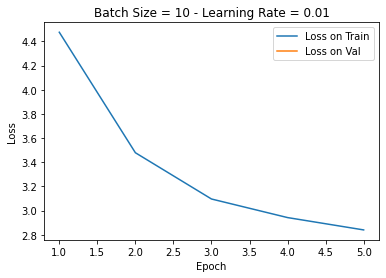

In [34]:
x = np.arange(1, len(TL)+1)
plt.plot(x, TL, label="Loss on Train")
plt.plot(x, VL, label="Loss on Val")
plt.legend()
plt.title(f"Batch Size = 10 - Learning Rate = 0.01")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [62]:
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
batch_sizes = [5, 10, 20, 30, 40]
TLS, VLS, TPS, VPS, TRS, VRS = [], [], [], [], [], []
for i in batch_sizes:
  for j in learning_rates:
    TL, VL, TP, VP, TR, VR = nn_multilabel.train(X_S1, Y_S1, batch_size=i, lr=j, max_epochs=200, loss_func='BCE', Xval = X_S2, Yval = Y_S2, verbose = False)
    TLS.append(TL)
    VLS.append(VL)
    TPS.append(TP)
    VPS.append(VP)
    TRS.append(TR)
    VRS.append(VR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [38]:
from itertools import product
labels = list(product(batch_sizes, learning_rates))
labels

[(5, 0.1),
 (5, 0.01),
 (5, 0.001),
 (5, 0.0001),
 (5, 1e-05),
 (10, 0.1),
 (10, 0.01),
 (10, 0.001),
 (10, 0.0001),
 (10, 1e-05),
 (20, 0.1),
 (20, 0.01),
 (20, 0.001),
 (20, 0.0001),
 (20, 1e-05),
 (30, 0.1),
 (30, 0.01),
 (30, 0.001),
 (30, 0.0001),
 (30, 1e-05),
 (40, 0.1),
 (40, 0.01),
 (40, 0.001),
 (40, 0.0001),
 (40, 1e-05)]

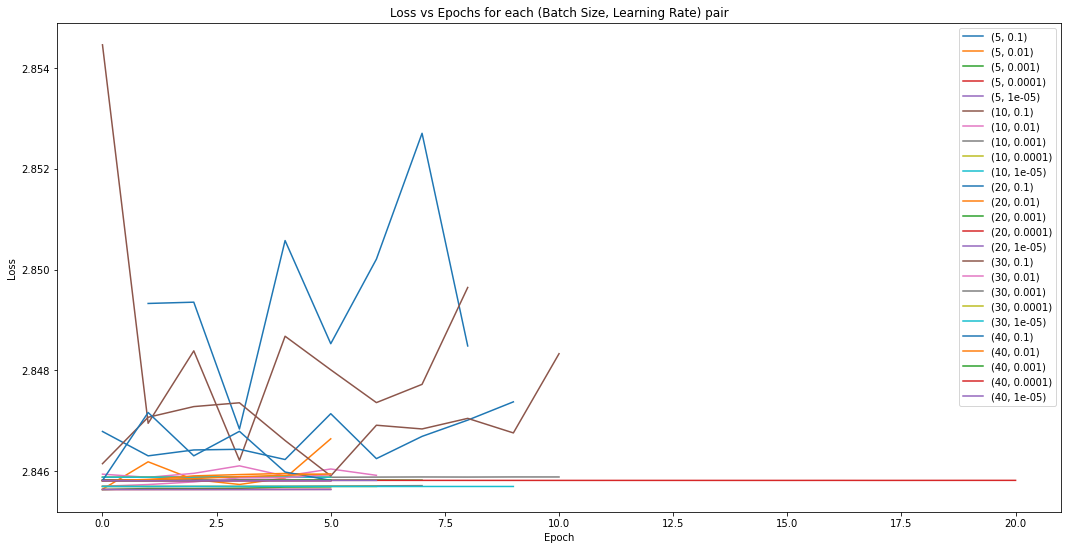

In [64]:
plt.figure(figsize=(18,9))
for VL in VLS:
  plt.plot(VL)
plt.legend(labels)
plt.title('Loss vs Epochs for each (Batch Size, Learning Rate) pair')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [68]:
np.argmin(VLS) # output 2 belongs to (5,0.1)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


2

Loss doesn't seem to decrease with epochs so maybe more (complexity) number of layers & neurons is desired.

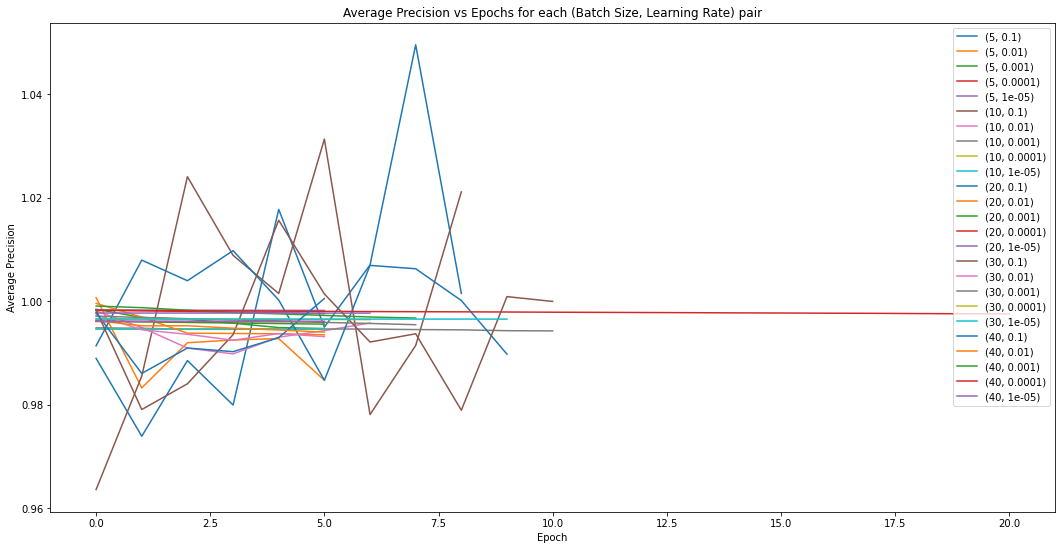

In [65]:
plt.figure(figsize=(18,9))
for VP in VPS:
  plt.plot(VP)
plt.legend(labels)
plt.title('Average Precision vs Epochs for each (Batch Size, Learning Rate) pair')
plt.xlabel("Epoch")
plt.ylabel("Average Precision")
plt.show()

In [71]:
np.argmax(VPS) # output 1 belongs to (5,0.1)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


1

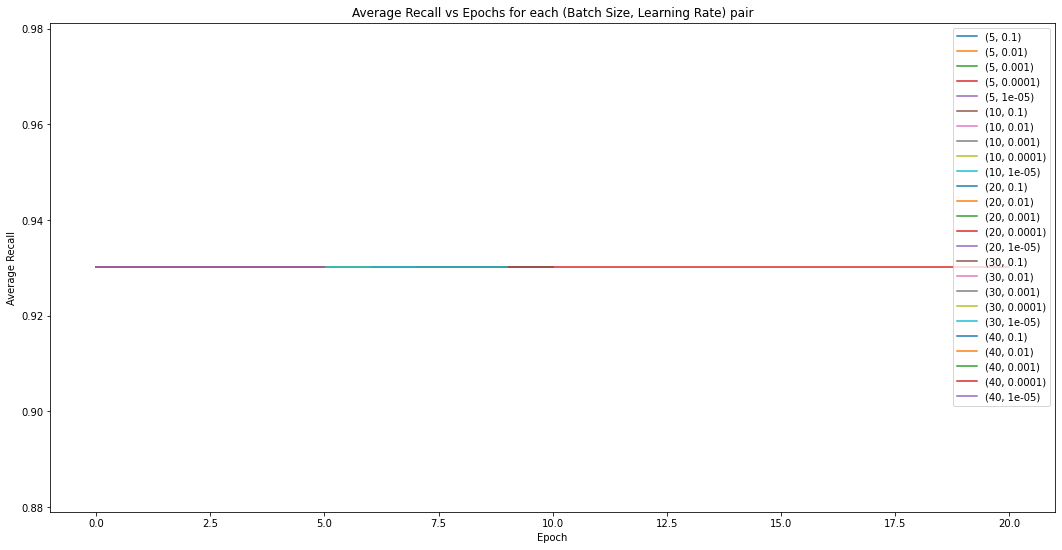

In [66]:
plt.figure(figsize=(18,9))
for VR in VRS:
  plt.plot(VR)
plt.legend(labels)
plt.title('Average Recall vs Epochs for each (Batch Size, Learning Rate) pair')
plt.xlabel("Epoch")
plt.ylabel("Average Recall")
plt.show()

In [72]:
np.argmax(VRS) # output 13 belongs to (5,0.001)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


13

Q2(f). The 3 graphs have been plotted. We have basically iteratively trained the network for different choices of 2 hyperparameters and tested the 2 performance metrics and loss on validation set. That pair of hyperparameters which give least loss and best metrics on validation should be ideally selected. This is because both higher precision & higher recall is generally desired (indicating higher performance) along with lower loss (indicating lower error). Checking on validation helps to identify those hyperparameters which yield a network which is good at generalisation or good predictive capability on new unseen data.

Least loss and highest precision was obtained in an epoch for batch size = 5 and learning rate = 0.1. There isn't visible change in recall value for different pairs of hyperparameters. So its okay even if we take a pair that doesn't yield best recall. As (5,0.1) is outperforming other pairs on loss & precision, I go ahead with it for re-training and testing.

In [76]:
X_train, Y_train = np.hstack((X_S1,X_S2)), np.hstack((Y_S1,Y_S2))
X_train.shape, Y_train.shape

((671, 9184), (5, 9184))

In [77]:
TrainL, TestL, TrainP, TestP, TrainR, TestR = nn_multilabel.train(X_train, Y_train, batch_size=5, lr=0.1, max_epochs=500, loss_func='BCE', Xval = X_S3, Yval = Y_S3, verbose = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


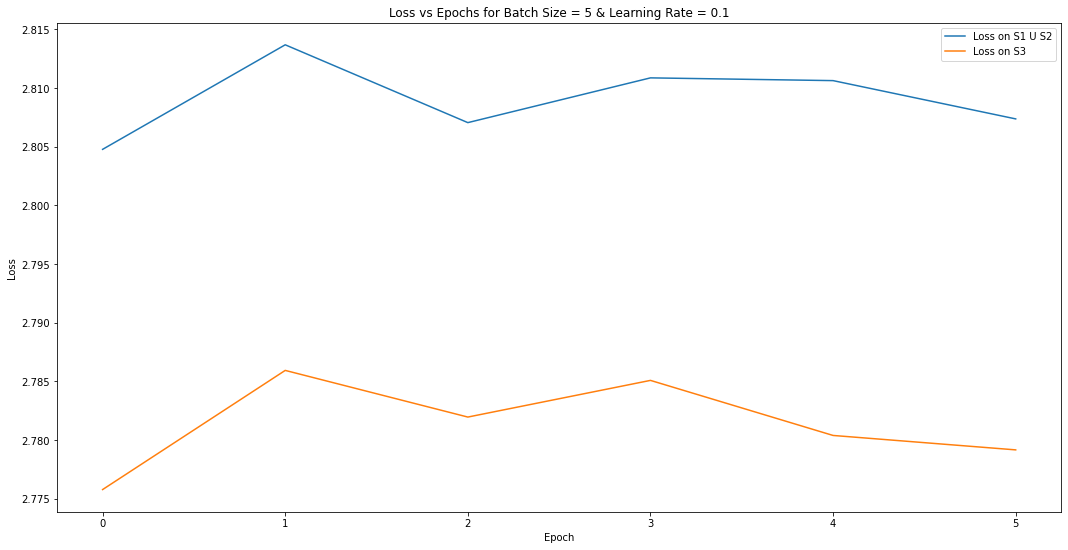

In [78]:
plt.figure(figsize=(18,9))
plt.plot(TrainL, label='Loss on S1 U S2')
plt.plot(TestL, label='Loss on S3')
plt.legend()
plt.title('Loss vs Epochs for Batch Size = 5 & Learning Rate = 0.1')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Loss on test data is lower than train data, so the validation strategy to choose hyperparameters seems to have yielded a generalised model

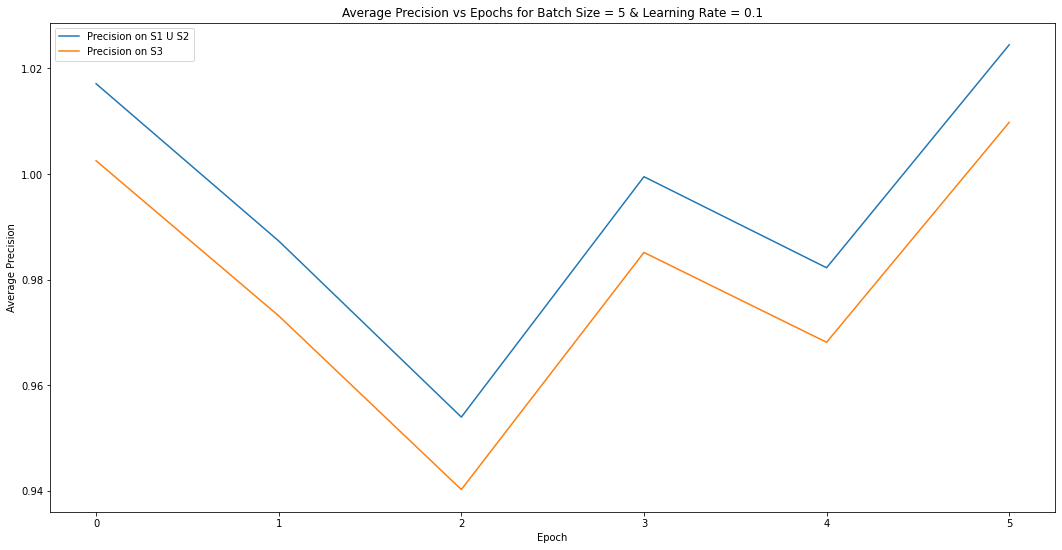

In [79]:
plt.figure(figsize=(18,9))
plt.plot(TrainP, label='Precision on S1 U S2')
plt.plot(TestP, label='Precision on S3')
plt.legend()
plt.title('Average Precision vs Epochs for Batch Size = 5 & Learning Rate = 0.1')
plt.xlabel("Epoch")
plt.ylabel("Average Precision")
plt.show()

Precision on test data is lower than train data but still very high

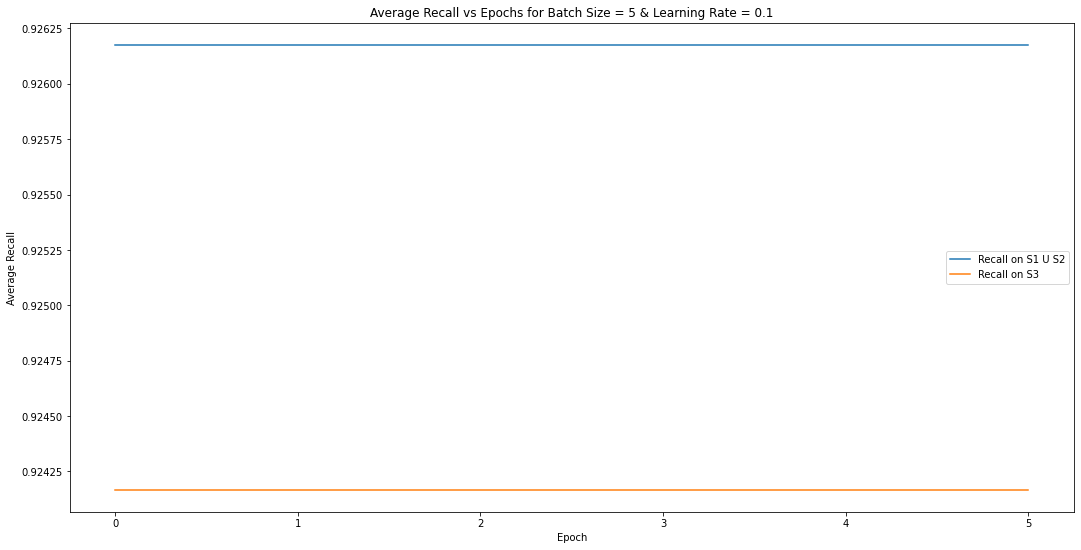

In [80]:
plt.figure(figsize=(18,9))
plt.plot(TrainR, label='Recall on S1 U S2')
plt.plot(TestR, label='Recall on S3')
plt.legend()
plt.title('Average Recall vs Epochs for Batch Size = 5 & Learning Rate = 0.1')
plt.xlabel("Epoch")
plt.ylabel("Average Recall")
plt.show()

Recall on test data is lower than train data but still very high

Again from all plots it is clear that learning is stopping pretty early (less epcohs as compared to max) bcoz of no iterative reduction in loss hence these experiments could ideally be tried with higher complexity network to perhaps yield better models, patterns & conclusions.